### DB접속 - amr ws 활용 

In [30]:
#DB에 접속하기 
import matplotlib.pyplot as plt
import mysql.connector 
import koreanize_matplotlib 
import pandas as pd 

plt.rcParams['font.family'] = 'NanumGothic'
conn = mysql.connector.connect(
    host = "database-1.cf8mgu8iylh3.ap-northeast-2.rds.amazonaws.com",
    port = 3306,
    user = "root",
    password = "42314231",
    database = "project")
cursor0=conn.cursor(buffered=True)

In [31]:
#테이블 목록 확인 

cursor0.execute("show tables") 
for x in cursor0:
    print(x) 

('서울_전기차_충전소_위치_연도별',)
('서울시_연료별_자동차',)
('서울시_자치구별_충전방해_민원건수',)
('연도별_서울시_전기차_누적_등록대수',)
('연도별_전국_전기차_누적_등록대수',)
('연도별_전기차_충전소_누적',)
('연도별_충전방해_민원건수',)
('전기차_충전소_설치현황',)
('전기차_충전소_설치현황_위경도포함',)
('전기차_충전소_위치_연도별',)
('충전소리스트',)


In [32]:
#서울시_연료별_자동차 테이블 불러오기 
#1) 전기차를 어떤 용도로 타는 사람이 가장 많을까? 
# 1-1) 승용/승합/화물/특수 전체 분류  
# 1-2) 구별 승용/승합/화물/특수 분류 

#2) 사업/비사업 
# 전체 사업/비사업 분류 
# 구별 사업/비사업 분류

#3) 용도별 어떤 종류의 차량이 많은가 
# 사업용 승용/승합/화물/특수 분류
# 비사업용 승용/승합/화물/특수 분류 

sql="select * from 서울시_연료별_자동차"

car_df = pd.read_sql_query(sql,conn) #서울시 연료별 자동차 판다스 데이터프레임으로 저장하기 

car_df=car_df.astype({'승용':'int'}) # 승용/승합/화물/특수 타입 object->int로 변환
car_df=car_df.astype({'승합':'int'})
car_df=car_df.astype({'화물':'int'})
car_df=car_df.astype({'특수':'int'})

car_df.info()

conn.close()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   시군구별    50 non-null     object
 1   연료별     50 non-null     object
 2   용도별     50 non-null     object
 3   승용      50 non-null     int64 
 4   승합      50 non-null     int64 
 5   화물      50 non-null     int64 
 6   특수      50 non-null     int64 
dtypes: int64(4), object(3)
memory usage: 2.9+ KB


/tmp/ipykernel_7851/231044775.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  car_df = pd.read_sql_query(sql,conn) #서울시 연료별 자동차 판다스 데이터프레임으로 저장하기


## 1- 전기차를 어떤 차량 종류로 타는 사람이 가장 많을까?  
### 1-1/ 서울시 전체를 차량별로 분류 (승용/승합/화물/특수 ) 
#### 막대그래프/ 파이차트

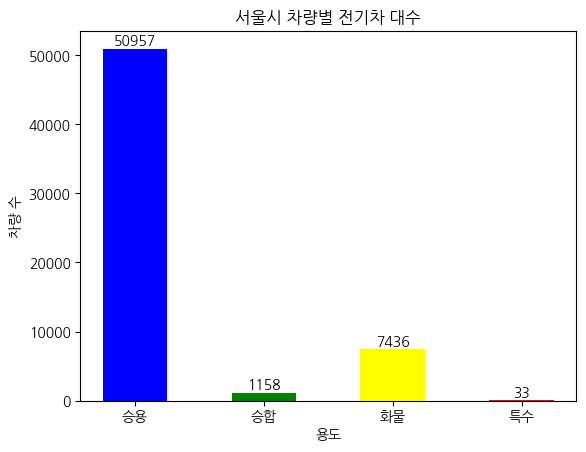

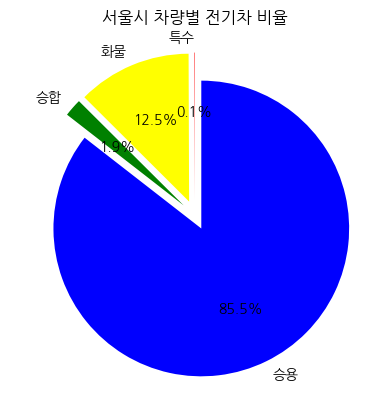

In [33]:
#1) 전기차를 어떤 용도로 타는 사람이 가장 많을까? 
# 승용/승합/화물/특수 전체 분류  
# 구별 승용/승합/화물/특수 분류 
# 승용/승합 차이 -승차 정원 10인승 이하는 승용, 승차 정원 11인승 이상은 승합
 
#1-1)서울시 전체 차량별 분류 
seoul_passenger_vehicle=sum(car_df['승용']) #전기 승용차 서울시 전체 합 
seoul_van=sum(car_df['승합']) #전기 승합차 서울시 전체 합 
seoul_truck=sum(car_df['화물']) #전기 화물차 서울시 전체 합 
seoul_specialty_vehicle=sum(car_df['특수']) #전기 특수차 서울시 전체 합 

#1-1-1) 막대그래프로 시각화 
x=['승용', '승합', '화물', '특수']
y=[seoul_passenger_vehicle,seoul_van,seoul_truck,seoul_specialty_vehicle]
c=['blue','green','yellow','red']
plt.bar(x, y, color = c, width = 0.5) 
#plt.ylim([min(y) -1000, max(y) +3000])
plt.title('서울시 차량별 전기차 대수') 
plt.xlabel('용도')
plt.ylabel('차량 수')
for i, txt in enumerate(y) : 
    plt.text(i, txt + 500, txt, ha = 'center') 
plt.show()
    
#1-1-2) 파이차트로 시각화하기
explode = [0.1, 0.1, 0.1, 0.1]
plt.pie(y, labels=x, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode, colors=c)
plt.title('서울시 차량별 전기차 비율') 
plt.show()


### 1-2/ 구에 따른 차량별 분류 
#### 1-2-1/ 구별로 (승용/승합/화물/특수) 나타난 막대그래프 

In [34]:
# 각 구에 등록된 전기차 수의 합 
#1-2)구에 따른 차량별 분류 -사업 비사업 일단 합쳐서 보기 
#car_df.head(50) 
car_by_region=car_df.groupby('시군구별').sum() #구별로 승용/승합/화물/특수 총 몇대인지 
region_name=car_by_region.index
region_name 

cc=car_by_region.loc[:,['승용', '승합',	'화물',	'특수']]
cc['총합']=cc.sum(axis=1)
ccc=cc['총합'].values.tolist()
car_by_region['합계']=ccc #car_df 데이터 프레임 수정- 합계 추가함  


/tmp/ipykernel_7851/823718871.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


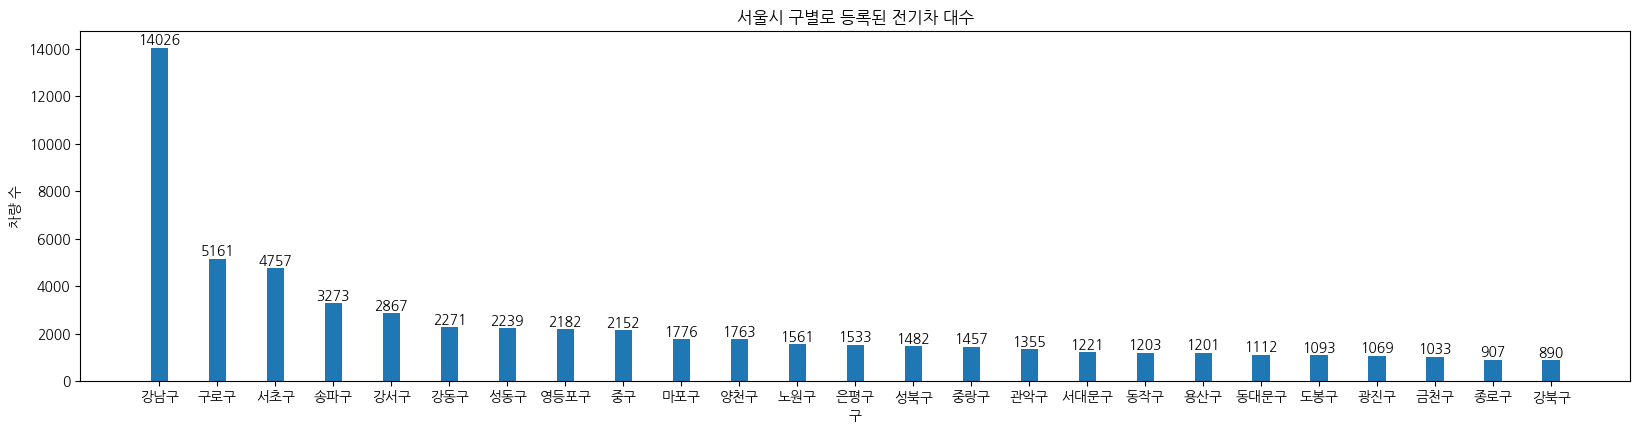

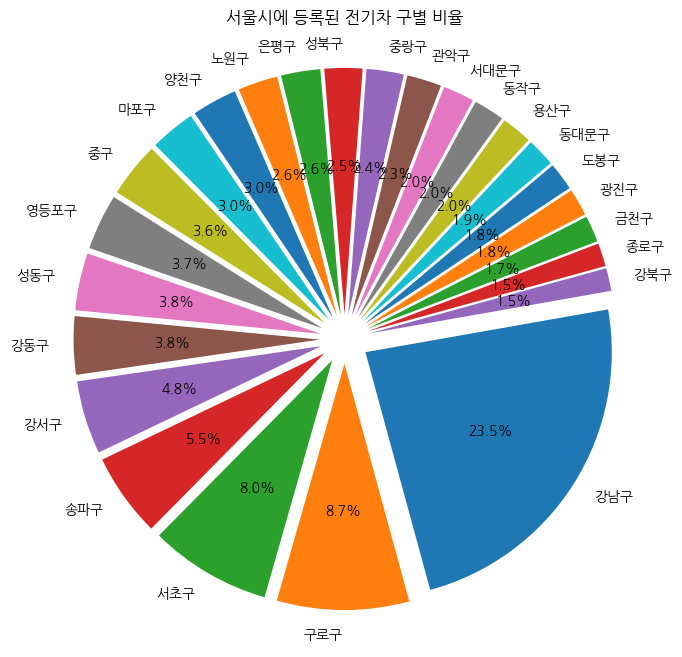

In [35]:
#각 구에 등록된 전기차수 확인해보기 
total_car_by_region=car_by_region.sort_values(by='합계',ascending=False)
total_car_by_region
#1-1-1) 막대그래프로 시각화 
fig, ax = plt.subplots(figsize=(20,10))
plt.subplot(2,1,1)
x=total_car_by_region.index
y=total_car_by_region['합계']
plt.bar(x, y, width = 0.3) 
#plt.ylim([min(y) -1000, max(y) +3000])
plt.title('서울시 구별로 등록된 전기차 대수') 
plt.xlabel('구')
plt.ylabel('차량 수')
plt.ylim()
for i, txt in enumerate(y) : 
    plt.text(i, txt + 150, txt, ha = 'center') 
    
#1-1-2) 파이차트로 시각화하기
plt.figure(figsize=(11, 8))
explode=[0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(y, labels=x, autopct='%.1f%%', startangle=10, explode=explode,counterclock=False)
plt.title('서울시에 등록된 전기차 구별 비율') 
plt.show()


/tmp/ipykernel_7851/9858029.py:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


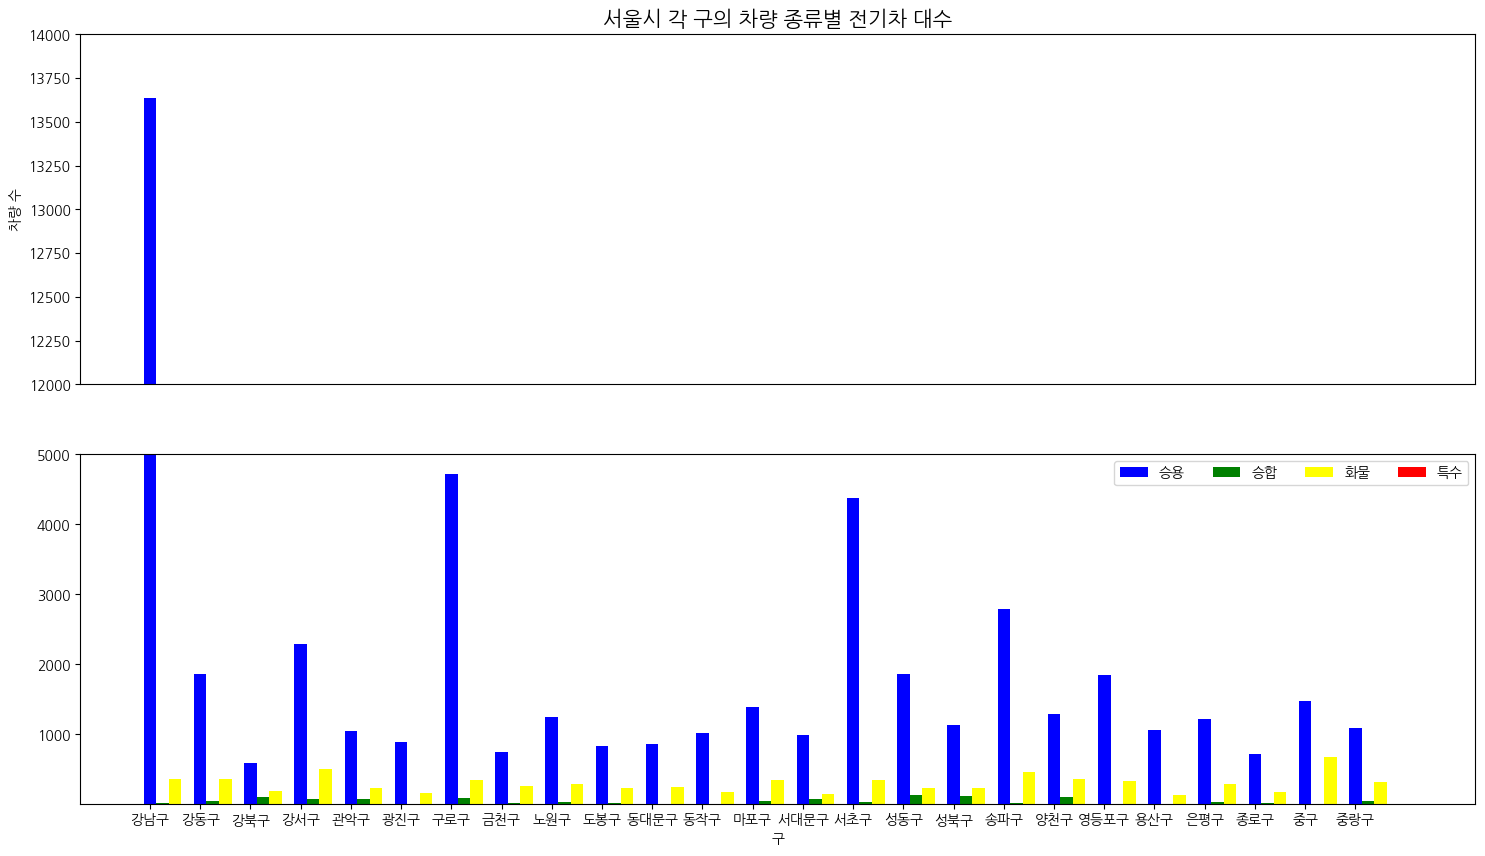

In [36]:
#1-2)구에 따른 차량별 분류 -사업 비사업 일단 합쳐서 보기 
#car_df.head(50) 
car_by_region=car_df.groupby('시군구별').sum() #구별로 승용/승합/화물/특수 총 몇대인지 
car_by_region.head(50) 
region_name=car_by_region.index
region_name

#시각화 어떻게 하지- 1. 구별로 승용/승합/화물/특수 막대그래프  2.승용/승합/화물/특수 각각 구별로 막대/파이 3.승용/승합/화물/특수 구별로 지도에 시각화

#1-2-1) 구별로 (승용/승합/화물/특수)인 막대그래프 
# 다중 막대 그래프 그리기 - 4개(승용/승합/화물/특수)

import numpy as np
fig, ax= plt.subplots(figsize=(18,10))
plt.subplot(2,1,1)
bar_width = 0.25
index = np.arange(len(car_by_region.index))

b1 = plt.bar(index, car_by_region['승용'], bar_width,  color='blue', label='승용')
b2 = plt.bar(index + bar_width, car_by_region['승합'], bar_width, color='green', label='승합')
b3 = plt.bar(index + 2 * bar_width,  car_by_region['화물'], bar_width, color='yellow', label='화물')
b4 = plt.bar(index + 4 * bar_width,  car_by_region['특수'], bar_width, color='red', label='특수')
#plt.legend(ncol=4)
#plt.xticks(index, region_name) 
plt.title('서울시 각 구의 차량 종류별 전기차 대수',fontsize=15) 
#plt.xlabel('구')
plt.ylabel('차량 수')
plt.xticks([])
plt.ylim(12000,14000)

plt.subplot(2,1,2)
bar_width = 0.25
index = np.arange(len(car_by_region.index))

b1 = plt.bar(index, car_by_region['승용'], bar_width,  color='blue', label='승용')
b2 = plt.bar(index + bar_width, car_by_region['승합'], bar_width, color='green', label='승합')
b3 = plt.bar(index + 2 * bar_width,  car_by_region['화물'], bar_width, color='yellow', label='화물')
b4 = plt.bar(index + 4 * bar_width,  car_by_region['특수'], bar_width, color='red', label='특수')
plt.legend(ncol=4)
plt.xticks(index, region_name) 
plt.xlabel('구')
#plt.ylabel('차량 수')
plt.ylim(1,5000)
plt.show()

#### 1-2-2/차량별로 구에따라 파이차트 

/tmp/ipykernel_7851/3048427169.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


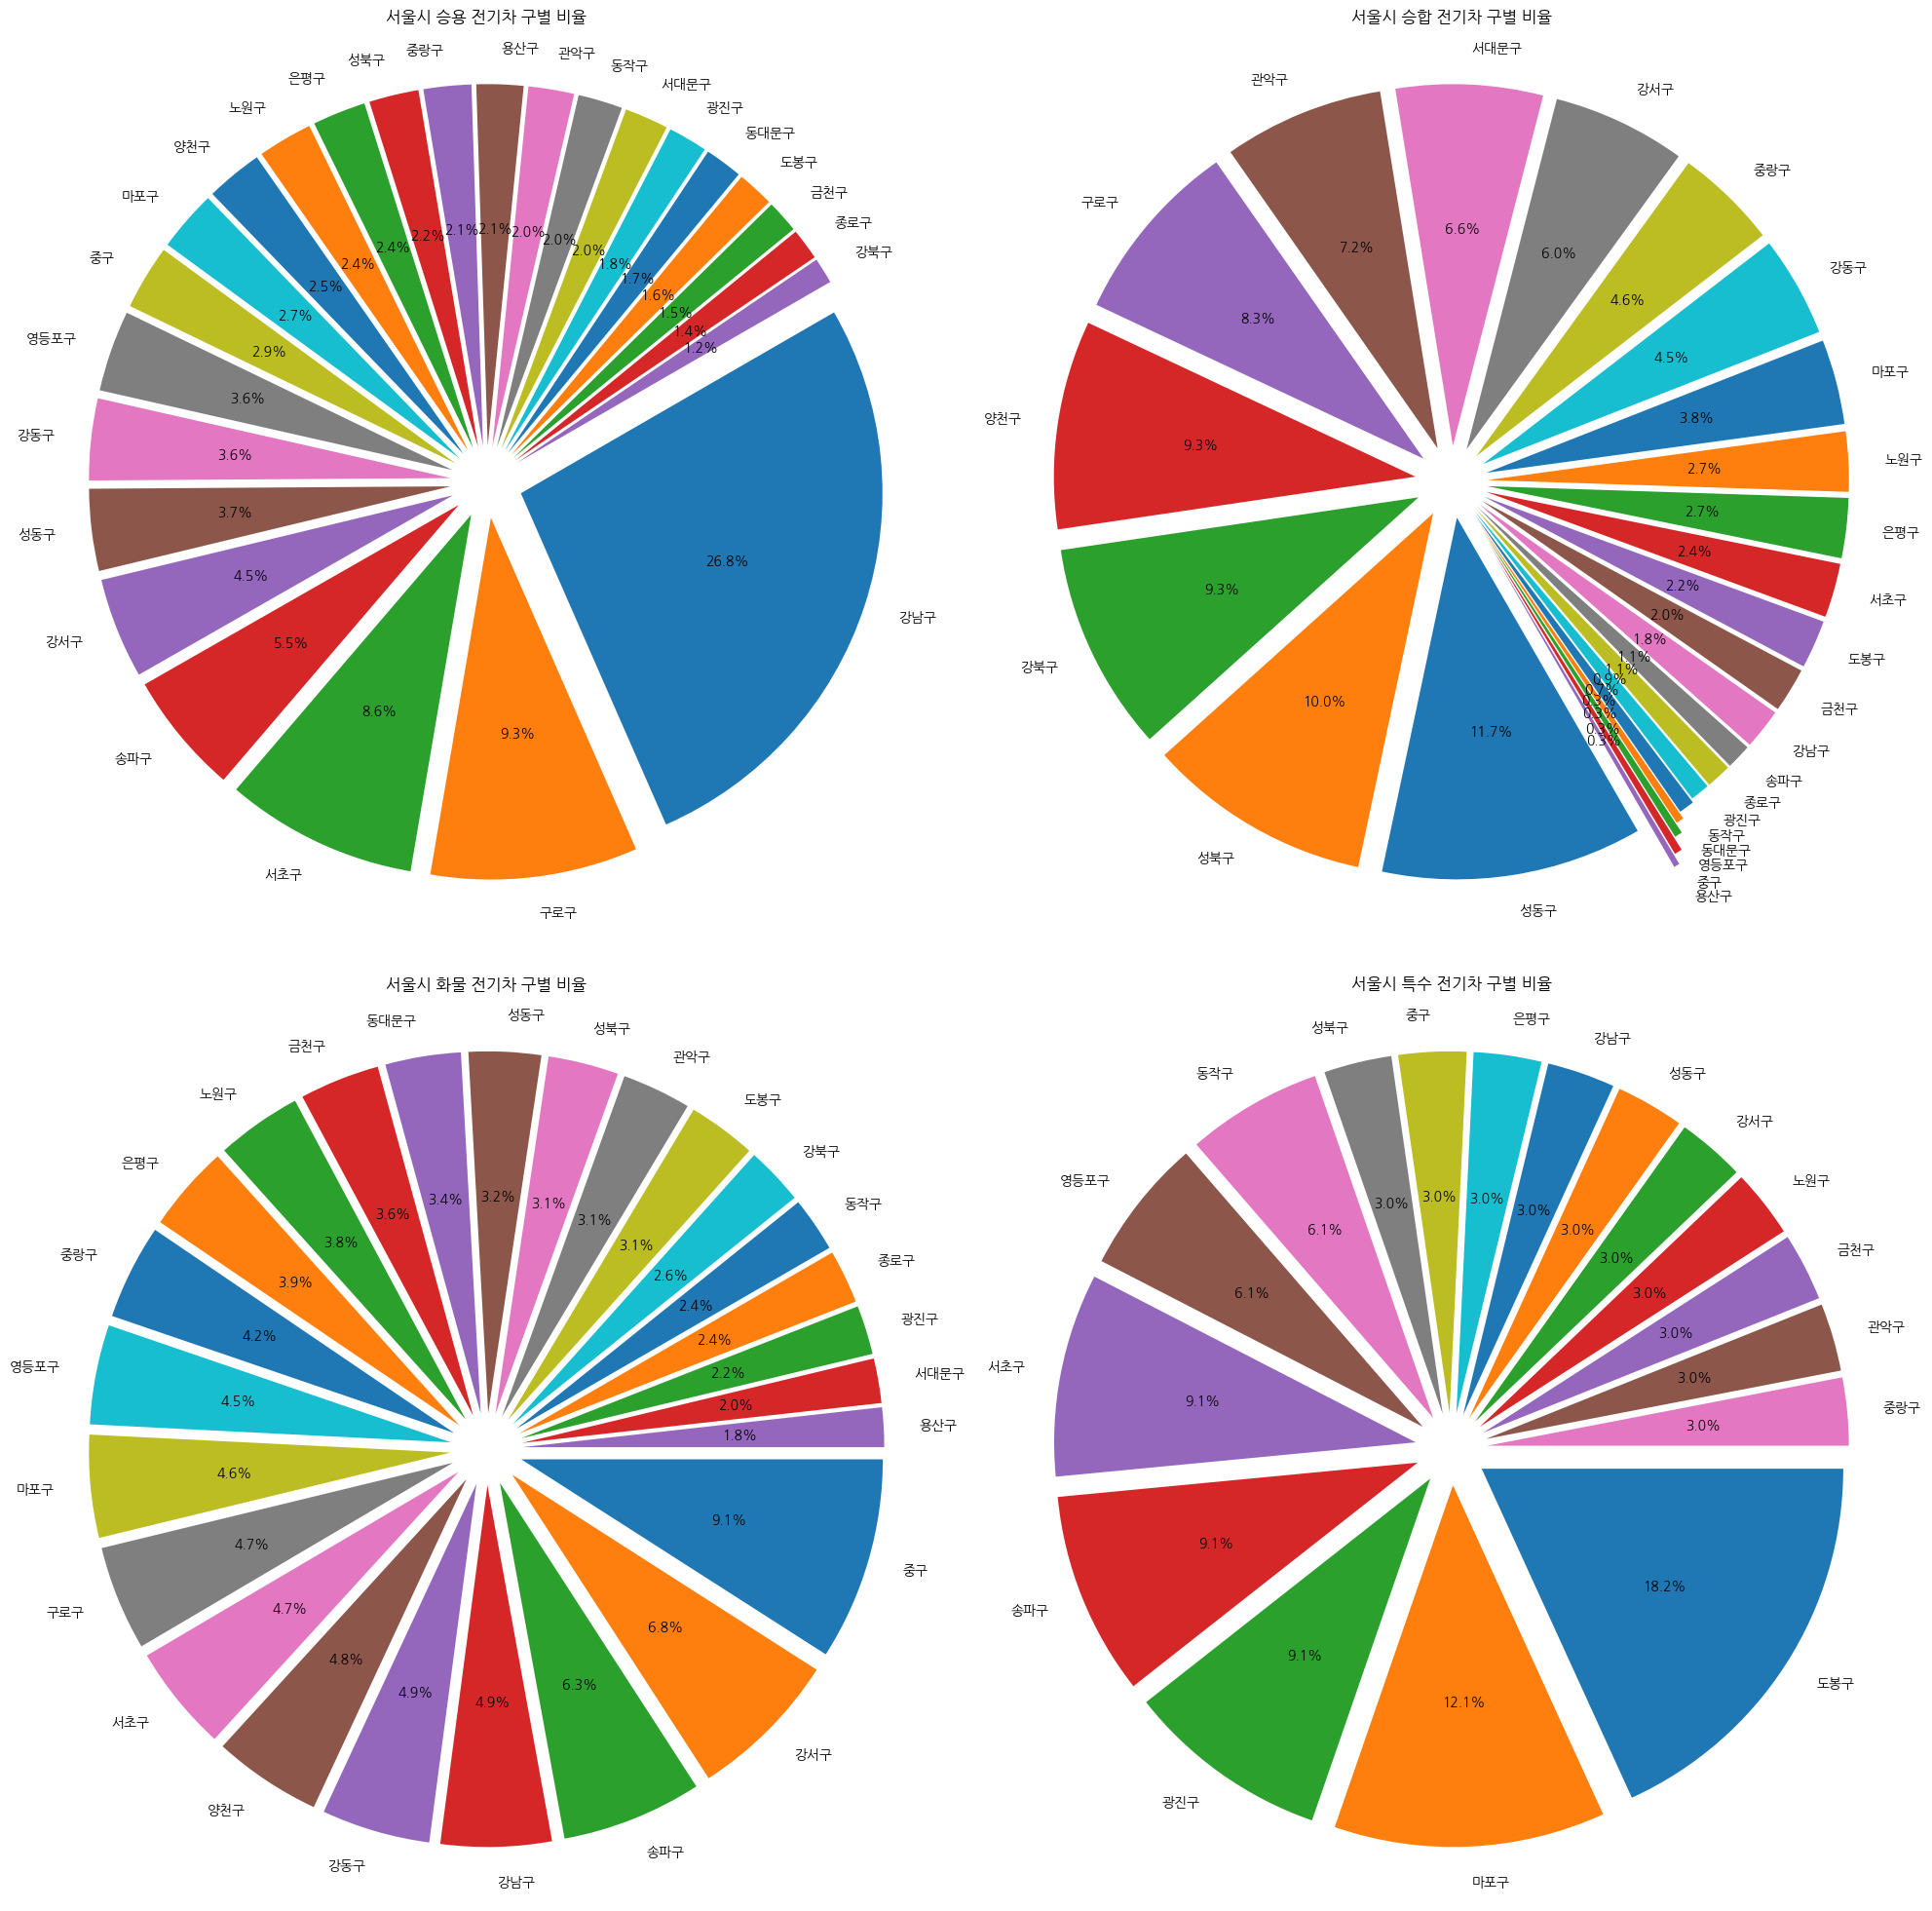

In [37]:
#1-2) 파이 차트로 
fig, ax = plt.subplots(figsize=(20,20))
explode=[0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

#승용 
plt.subplot(2,2,1)
a=car_by_region.sort_values(by='승용',ascending=False)
x=a.index
y=a['승용']
plt.pie(y, labels=x, autopct='%.1f%%', explode=explode, startangle=30, counterclock=False)
plt.title('서울시 승용 전기차 구별 비율') 

#승합
plt.subplot(2,2,2)
b=car_by_region.sort_values(by='승합',ascending=False)
x=b.index
y=b['승합']
explodes=[0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.11,0.13,0.16,0.2,0.23]
plt.pie(y, labels=x, autopct='%.1f%%', explode=explodes, startangle=300, counterclock=False)
plt.title('서울시 승합 전기차 구별 비율') 

#화물
plt.subplot(2,2,3)
c=car_by_region.sort_values(by='화물',ascending=False)
x=c.index
y=c['화물']
plt.pie(y, labels=x, autopct='%.1f%%', explode=explode, startangle=0, counterclock=False)
plt.title('서울시 화물 전기차 구별 비율') 

#특수 
plt.subplot(2,2,4)
special_car=car_by_region[car_by_region['특수']>0]
d=special_car.sort_values(by='특수',ascending=False)
x=d.index
y=d['특수']
explodess=[0.1,0.1,0.1, 0.1, 0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
plt.pie(y, labels=x, autopct='%.1f%%', explode=explodess, startangle=0, counterclock=False)
plt.title('서울시 특수 전기차 구별 비율') 
plt.tight_layout()
plt.show()


In [38]:
car_by_region #인덱스가 시군구 
car_by_regions=car_by_region.reset_index() #인덱스가 없음 

#### 차량별로 서울시 지도에 시각화 
##### 등록된 전기 승용차량 구별 시각화 - 강남/서초/송파/구로에 승용차 용도의 전기차가 많이 등록

In [39]:
#1-2-3) 지도에 시각화 승용/승합/화물/특수  

#승용 구별 시각화 
import folium 
import json 
geo_path='../data/02. skorea_municipalities_geo_simple.json'
geo_str=json.load(open(geo_path,encoding='utf-8'))

my_map=folium.Map(location=[37.5502,126.982],zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=car_by_region,
    fill_color='PuRd', 
    key_on="feature.id",
    fill_opacity=0.5, line_opacity=1, 
    columns=[car_by_region['승용'].index,'승용'],
    legend_name='지역구별 승용 전기차 수').add_to(my_map) 
my_map


##### 등록된 전기 승합차량 구별 시각화 - 양천/구로/성동/성북구에 승합차 용도의 전기차가 많이 등록

In [40]:
#승합 구별 시각화 
my_map2=folium.Map(location=[37.5502,126.982],zoom_start=11)
folium.Choropleth(
    geo_data=geo_str,
    data=car_by_region,
    fill_color='PuRd', 
    key_on="feature.id",
    fill_opacity=0.5, line_opacity=1, 
    columns=[car_by_region['승합'].index,'승합'],
    legend_name='지역구별 승합 전기차 수').add_to(my_map2) 
my_map2

##### 등록된 전기 화물차량 구별 시각화 - 중구/강서구/송파구에 화물차 용도의 전기차가 많이 등록

In [41]:
#화물 구별 시각화 
my_map3=folium.Map(location=[37.5502,126.982],zoom_start=11)
folium.Choropleth(
    geo_data=geo_str,
    data=car_by_region,
    fill_color='PuRd', 
    key_on="feature.id",
    fill_opacity=0.5, line_opacity=1, 
    columns=[car_by_region['화물'].index,'화물'],
    legend_name='지역구별 화물 전기차 수').add_to(my_map3) 
my_map3

##### 등록된 전기 특수차량 구별 시각화 - 도봉/마포에 승용차 용도의 전기차가 많이 등록

In [42]:
#특수 구별 시각화 
my_map4=folium.Map(location=[37.5502,126.982],zoom_start=11)
folium.Choropleth(
    geo_data=geo_str,
    data=car_by_region,
    fill_color='PuRd', 
    key_on="feature.id",
    fill_opacity=0.5, line_opacity=1, 
    columns=[car_by_region['특수'].index,'특수'],
    legend_name='지역구별 특수 전기차 수').add_to(my_map4) 
my_map4

In [43]:
c=car_df.set_index('시군구별')
cc=c.loc[:,['승용', '승합',	'화물',	'특수']]
cc['총합']=cc.sum(axis=1)
ccc=cc['총합'].values.tolist()
car_df['합계']=ccc #car_df 데이터 프레임 수정- 합계 추가함 
car_dfs=car_df.drop(labels='연료별',axis=1)

In [44]:
car_dfs #각 구별로 비사업/ 사업 각 합계 추가한 데이터프레임 -연료별 칼럼은 사용 안해서 삭제

,시군구별,용도별,승용,승합,화물,특수,합계
0,종로구,비사업용,686,1,76,0,763
1,종로구,사업용,30,12,102,0,144
2,중구,비사업용,1008,4,610,1,1623
3,중구,사업용,465,0,64,0,529
4,용산구,비사업용,1022,3,90,0,1115
5,용산구,사업용,45,0,41,0,86
6,성동구,비사업용,1208,3,170,1,1382
7,성동구,사업용,655,132,70,0,857
8,광진구,비사업용,720,0,96,3,819
9,광진구,사업용,173,10,67,0,250


## 2- 전기차는 어떤 용도로 많이 사용될까 
### 사업용/비사업용으로 분류해보자 
#### 2-1/ 서울시 전체 대상으로 비사업/사업 나눠보기 - 막대그래프/파이차트 
##### -> 서울시에서는 비사업용으로 등록된 전기차량이 더 많다 

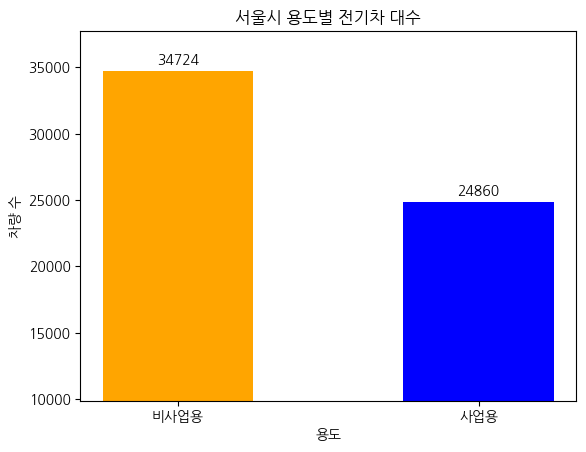

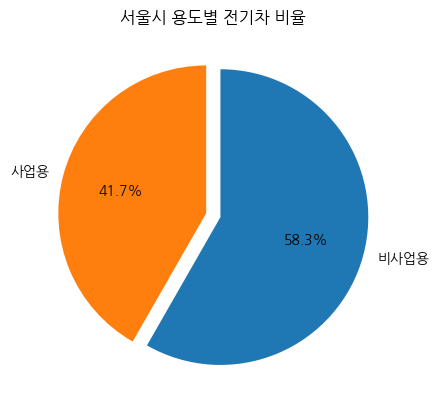

In [45]:
#2) 사업/비사업 
# 전체 사업/비사업 분류 

#2-1)서울시 전체 용도별 분류 

seoul_b_nb=car_df.groupby('용도별').sum() 
seoul_b_nb=seoul_b_nb.drop(['시군구별','연료별'],axis=1)
seoul_b_nb

x=seoul_b_nb.index
y=seoul_b_nb['합계']  
plt.bar(x, y, width = 0.5, color=['orange','blue']) 
plt.ylim([min(y)-15000, max(y) +3000])
plt.title('서울시 용도별 전기차 대수') 
plt.xlabel('용도')
plt.ylabel('차량 수')
for i, txt in enumerate(y) : 
    plt.text(i, txt + 500, txt, ha = 'center') 
plt.show()

#파이차트 
explode = [0.05, 0.05]
plt.pie(y, labels=x, autopct='%.1f%%', startangle=90, counterclock=False, explode=explode)
plt.title('서울시 용도별 전기차 비율') 
plt.show()

### 각 구별로 사업용/비사업용 분류 - 막대그래프 
#### 사업용으로 등록된 차량이 더 많은 구 - 강남/구로 - 회사가 많은 곳들 
#### 나머지 구들에서는 비사업용으로 등록된 차량이 더 많다 

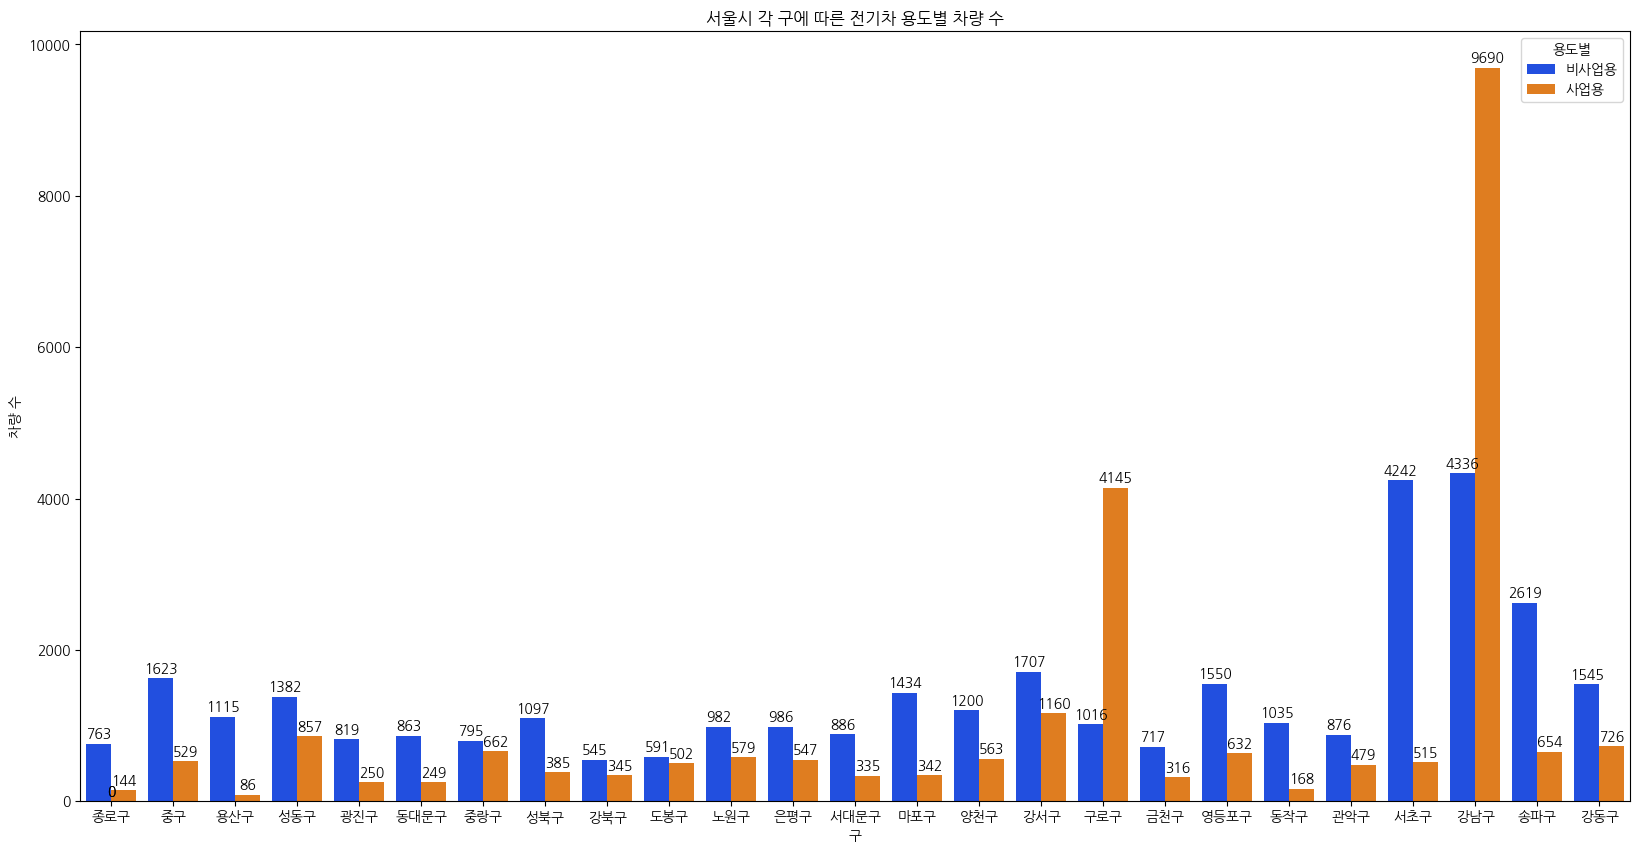

In [46]:
#2-2) 구별 비사업/사업 분류 
import seaborn as sns 
plt.figure(figsize=(20,10))
sns.set_palette("bright")
ax=sns.barplot(x='시군구별',y='합계', data=car_dfs,hue='용도별')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, # x 좌표
            p.get_y() + p.get_height()+75 , # y 좌표
            f"{p.get_height():.0f}", # 값
            ha='center') 
    
plt.title('서울시 각 구에 따른 전기차 용도별 차량 수') 
plt.xlabel('구')
plt.ylabel('차량 수')
plt.show()

In [47]:
#3) 용도별 어떤 종류의 차량이 많은가 
# 사업용 승용/승합/화물/특수 분류
# 비사업용 승용/승합/화물/특수 분류 
car_df
business_car=car_df[car_df['용도별'] == '사업용']
business_car=business_car.reset_index(drop=True)
business_car #사업용 차량 

non_business_car=car_df[car_df['용도별'] == '비사업용']
non_business_car=non_business_car.reset_index(drop=True)
non_business_car #비사업용 차량 
business_car=business_car.set_index('시군구별')
non_business_car=non_business_car.set_index('시군구별')


### 사업용으로 등록된 전기차량 서울시 지도에 시각화 - 강남/구로에 많이 등록됨 

In [48]:
#지도에 시각화 사업용/비사업용  ---- 
#사업용 구별 시각화 
import folium 
import json 
geo_path='../data/02. skorea_municipalities_geo_simple.json'
geo_str=json.load(open(geo_path,encoding='utf-8'))

my_map2_1=folium.Map(location=[37.5502,126.982],zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=business_car,
    fill_color='PuRd', 
    key_on="feature.id",
    fill_opacity=0.5, line_opacity=1, 
    columns=[business_car['합계'].index,'합계'],
    legend_name='지역구별 사업용 전기차 수').add_to(my_map2_1) 
my_map2_1 

### 비사업용으로 등록된 전기차량 서울시 지도에 시각화 - 서초/강남/송파구에 많이 등록됨 

In [49]:
#비사업용 구별 시각화 
import folium 
import json 
geo_path='../data/02. skorea_municipalities_geo_simple.json'
geo_str=json.load(open(geo_path,encoding='utf-8'))

my_map2_2=folium.Map(location=[37.5502,126.982],zoom_start=11)

folium.Choropleth(
    geo_data=geo_str,
    data=non_business_car,
    fill_color='PuRd', 
    key_on="feature.id",
    fill_opacity=0.5, line_opacity=1, 
    columns=[non_business_car['합계'].index,'합계'],
    legend_name='지역구별 비사업용 전기차 수').add_to(my_map2_2) 
my_map2_2 

### 3- 용도별(사업/비사업)에 따라서는 어떤 종류의 전기차량이 많을까? 

In [50]:
#3) 용도별 어떤 종류의 차량이 많은가 
# 사업용 승용/승합/화물/특수 분류
# 비사업용 승용/승합/화물/특수 분류 

# 사업용 승용/승합/화물/특수 분류 - 합계추가 
b_sum_df = pd.DataFrame({'용도별':'사업용',
    '승용': [business_car['승용'].sum()],
    '승합': [business_car['승합'].sum()],
    '화물': [business_car['화물'].sum()],
    '특수': [business_car['특수'].sum()]
}) 

# 비사업용 총합 -합계추가 
nb_sum_df = pd.DataFrame({'용도별':'사업용',
    '승용': [non_business_car['승용'].sum()],
    '승합': [non_business_car['승합'].sum()],
    '화물': [non_business_car['화물'].sum()],
    '특수': [non_business_car['특수'].sum()]
}) 

# 합치기 -사업/비사업 차량별 등록대수 확인 
b_df = pd.DataFrame({'용도별':['사업용','비사업용'],
    '승용': [business_car['승용'].sum(),non_business_car['승용'].sum()],
    '승합': [business_car['승합'].sum(),non_business_car['승합'].sum()],
    '화물': [business_car['화물'].sum(),non_business_car['화물'].sum()],
    '특수': [business_car['특수'].sum(),non_business_car['특수'].sum()]
}) 

b_df

,용도별,승용,승합,화물,특수
0,사업용,20551,1059,3250,0
1,비사업용,30406,99,4186,33


#### 3-1/ 용도에 따른 차량 종류별 등록대수 확인 - 막대차트

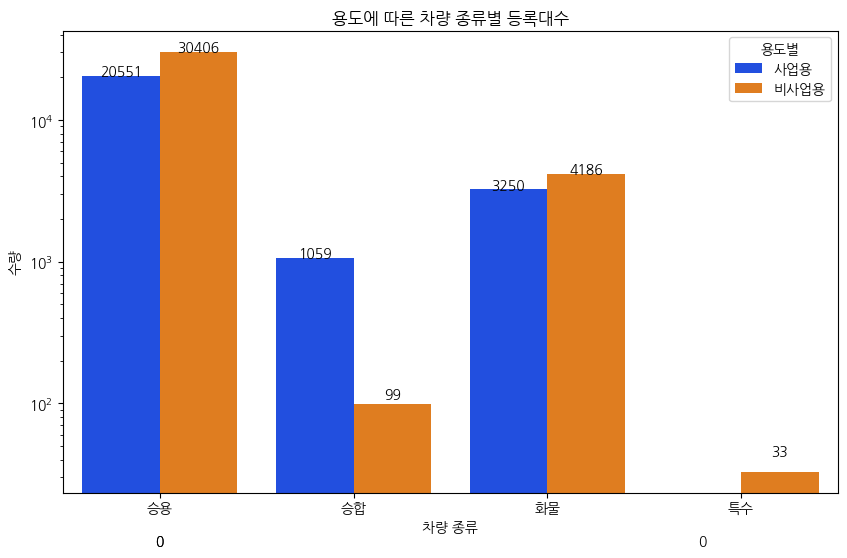

In [51]:
df_pivot = b_df.melt(id_vars='용도별', var_name='차량 종류', value_name='수량')

# 바 그래프 그리기
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='차량 종류', y='수량', hue='용도별', data=df_pivot)

plt.xlabel('차량 종류')
plt.ylabel('수량')
plt.title('용도에 따른 차량 종류별 등록대수')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2, # x 좌표
            p.get_y() + p.get_height()+10 , # y 좌표
            f"{p.get_height():.0f}", # 값
            ha='center') 
    
plt.yscale("log")
plt.show() 



In [52]:
df_pivot
df_pivot = b_df.melt(id_vars='용도별', var_name='차량 종류', value_name='수량') 
df_pivot

a= df_pivot.set_index('차량 종류')
c= df_pivot.pivot(index='차량 종류', columns='용도별', values='수량').reset_index()
d= c.set_index('차량 종류')
car_type_nb_b=d.sort_values(by=list(d.columns), ascending=False)
car_type_nb_b

용도별,비사업용,사업용
차량 종류,,
승용,30406,20551
화물,4186,3250
승합,99,1059
특수,33,0


#### 사업용/ 비사업용 차량 종류별로 분류하여 파이차트로 

/tmp/ipykernel_7851/3119845699.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


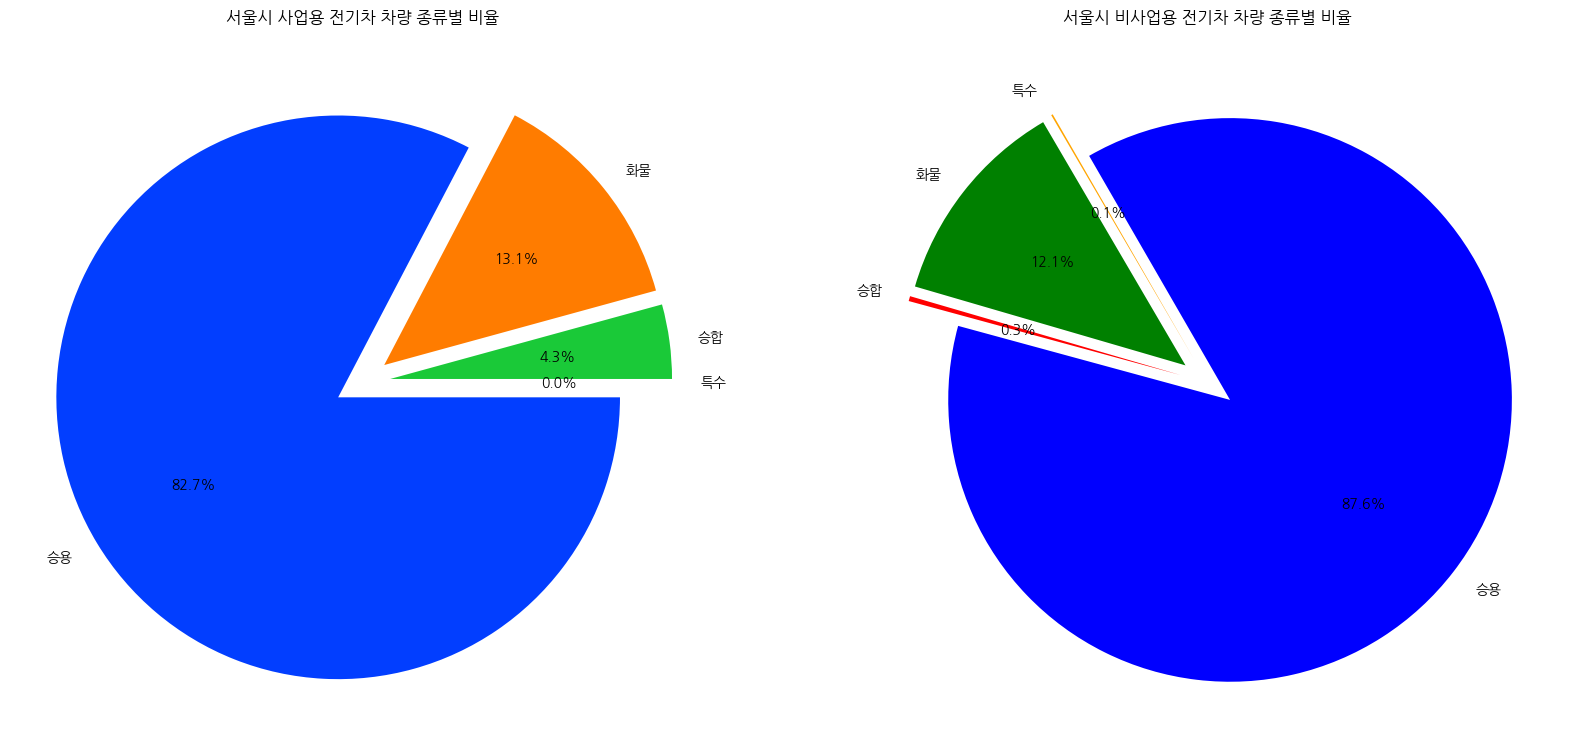

In [53]:
#사업용을 차량 종류별로 분류하기- 파이차트에 
fig, ax = plt.subplots(figsize=(20,20))
explode=[0.1, 0.1, 0.1,0.1] 
plt.subplot(1,2,1)
x=car_type_nb_b.index
y=car_type_nb_b['사업용'].sort_values(ascending=False)
plt.pie(y, labels=x, autopct='%.1f%%', explode=explode, startangle=0, counterclock=False)
plt.title('서울시 사업용 전기차 차량 종류별 비율')  


desired_order = ['승용', '승합', '화물', '특수']
car_type_nb_bs = car_type_nb_b.reindex(desired_order)
plt.subplot(1,2, 2)
x=car_type_nb_bs.index
y=car_type_nb_bs['비사업용']
plt.pie(y, labels=x, autopct='%.1f%%', explode=explode, startangle=1200, counterclock=False, colors=['blue','red','green','orange'])
plt.title('서울시 비사업용 전기차 차량 종류별 비율')  

plt.show()


In [54]:
#사업용 차량들의 구별 승용/승합/화물/특수 분류? 
business_car

,연료별,용도별,승용,승합,화물,특수,합계
시군구별,,,,,,,
종로구,전기,사업용,30,12,102,0,144
중구,전기,사업용,465,0,64,0,529
용산구,전기,사업용,45,0,41,0,86
성동구,전기,사업용,655,132,70,0,857
광진구,전기,사업용,173,10,67,0,250
동대문구,전기,사업용,141,0,108,0,249
중랑구,전기,사업용,432,52,178,0,662
성북구,전기,사업용,155,115,115,0,385
강북구,전기,사업용,175,73,97,0,345
